In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
math = pd.read_excel('Data/Maths.csv')
portuguese = pd.read_excel('Data/Portuguese.csv')

In [31]:
df = pd.concat((math, portuguese))

In [32]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11
649,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048 entries, 0 to 650
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1048 non-null   object
 1   sex         1048 non-null   object
 2   age         1048 non-null   int64 
 3   address     1048 non-null   object
 4   famsize     1048 non-null   object
 5   Pstatus     1048 non-null   object
 6   Medu        1048 non-null   int64 
 7   Fedu        1048 non-null   int64 
 8   Mjob        1048 non-null   object
 9   Fjob        1048 non-null   object
 10  reason      1048 non-null   object
 11  guardian    1048 non-null   object
 12  traveltime  1048 non-null   int64 
 13  studytime   1048 non-null   int64 
 14  failures    1048 non-null   int64 
 15  schoolsup   1048 non-null   object
 16  famsup      1048 non-null   object
 17  paid        1048 non-null   object
 18  activities  1048 non-null   object
 19  nursery     1048 non-null   object
 20  higher      10

#### Согласно метаданным:
Столбцы, имеющие только 2 значения:
* sex: M - мужской, F - женский
* address: U - городской, R - сельский
* famsize(размер семьи): больше чем 3 человека(GT3) в семье или меньше или равно(LE3)
* Pstatus(состояние сожительства родитетей): T - живут вместе, A - раздельно
* schoolsup, famsup, paid, activities, nursery, higher, internet, romantic: yes/no

заменяем на бинарные столбцы True/False, с соответствующей, логической, заменой имён столбцов, если неообходимо

Столбец guardian(Опекун) кодирую по словарю father = -1, other = 0, mother = 1

#### Столбцы G1-3 ссумирую в новый - Успеваемость
#### Так же решил перевести все названия на русский, чтобы они лучше смотрелись на графиках

In [34]:

df['Пол'] = df['sex'] == 'M'
df['Живёт в городе'] = df['address'] == 'U'
df['Семья из 3+ человек'] = df['famsize'] == 'GT3'
df['Родители живут вместе'] = df['Pstatus'] == 'T'
df['Опекун'] = df['guardian'].replace({'father': -1, 'other': 0,'mother': 1})
df = df.drop(columns=['sex', 'address', 'famsize', 'Pstatus', 'guardian'])
df = df.replace('yes', True).replace('no', False)
df['Успеваемость'] = df.G1 + df.G2 + df.G3
df.columns = ["Школа", "Возраст", "Образование матери", "Образование отца", "Профессия матери", "Профессия отца", "Причина выбора школы",
              "Время до школы", "Время на учёбу", "Предыдущие провалы тестов", "Доп. помощь от школы", "Помощь семьи", "Платные дополнительные",
              "Внеучебная активность", "Ходил в детсад", "Хочет высшее", "Доступ к интернету", "В отношениях", "Семейные отношения",
              "Свободное время", "Прогулки с друзьями", "Алкоголь по будням", "Алкоголь по выходным", "Здоровье", "Пропуски занятий",
              "Оценка за период 1", "Оценка за период 2", "Оценка за период 3", "Пол", "Живёт в городе", "Семья из 3+ человек",
              "Родители живут вместе", "Опекун", "Успеваемость"]

### Построение графика 1

In [35]:
corr_df = df.select_dtypes(exclude='object').corr().drop(index=["Оценка за период 1", "Оценка за период 2", "Оценка за период 3", "Успеваемость"])
corr_df['index'] = corr_df.index

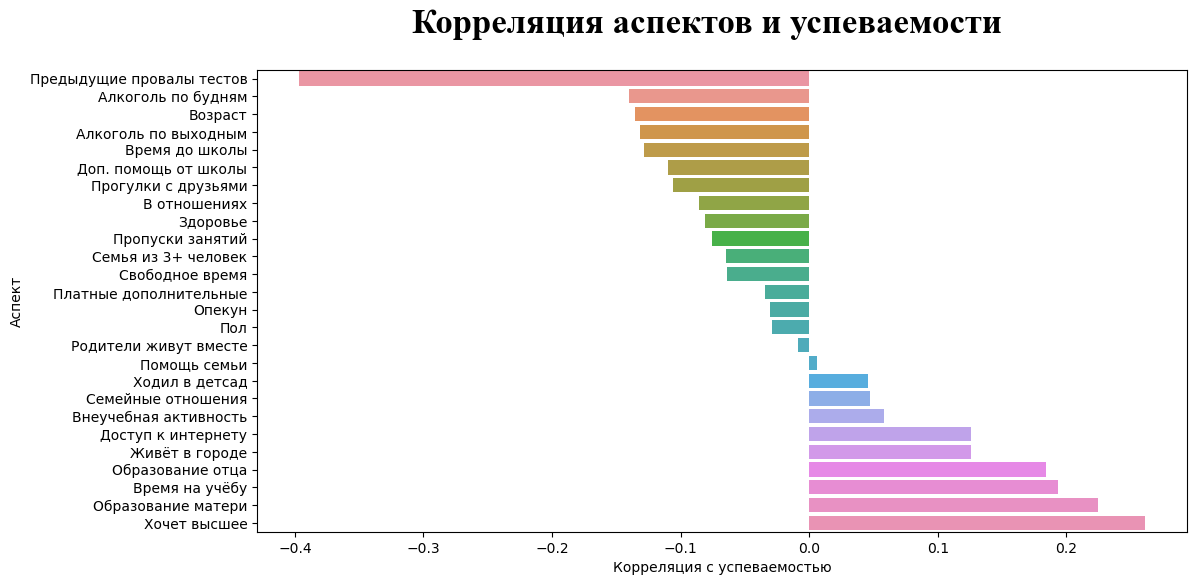

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
fig.suptitle('Корреляция аспектов и успеваемости', fontsize=25, fontname="Times New Roman", fontweight='bold')

sns.barplot(corr_df.sort_values('Успеваемость'), x='Успеваемость', y='index', ax=ax)
ax.set(xlabel='Корреляция с успеваемостью', ylabel='Аспект');

### Построение графика 2

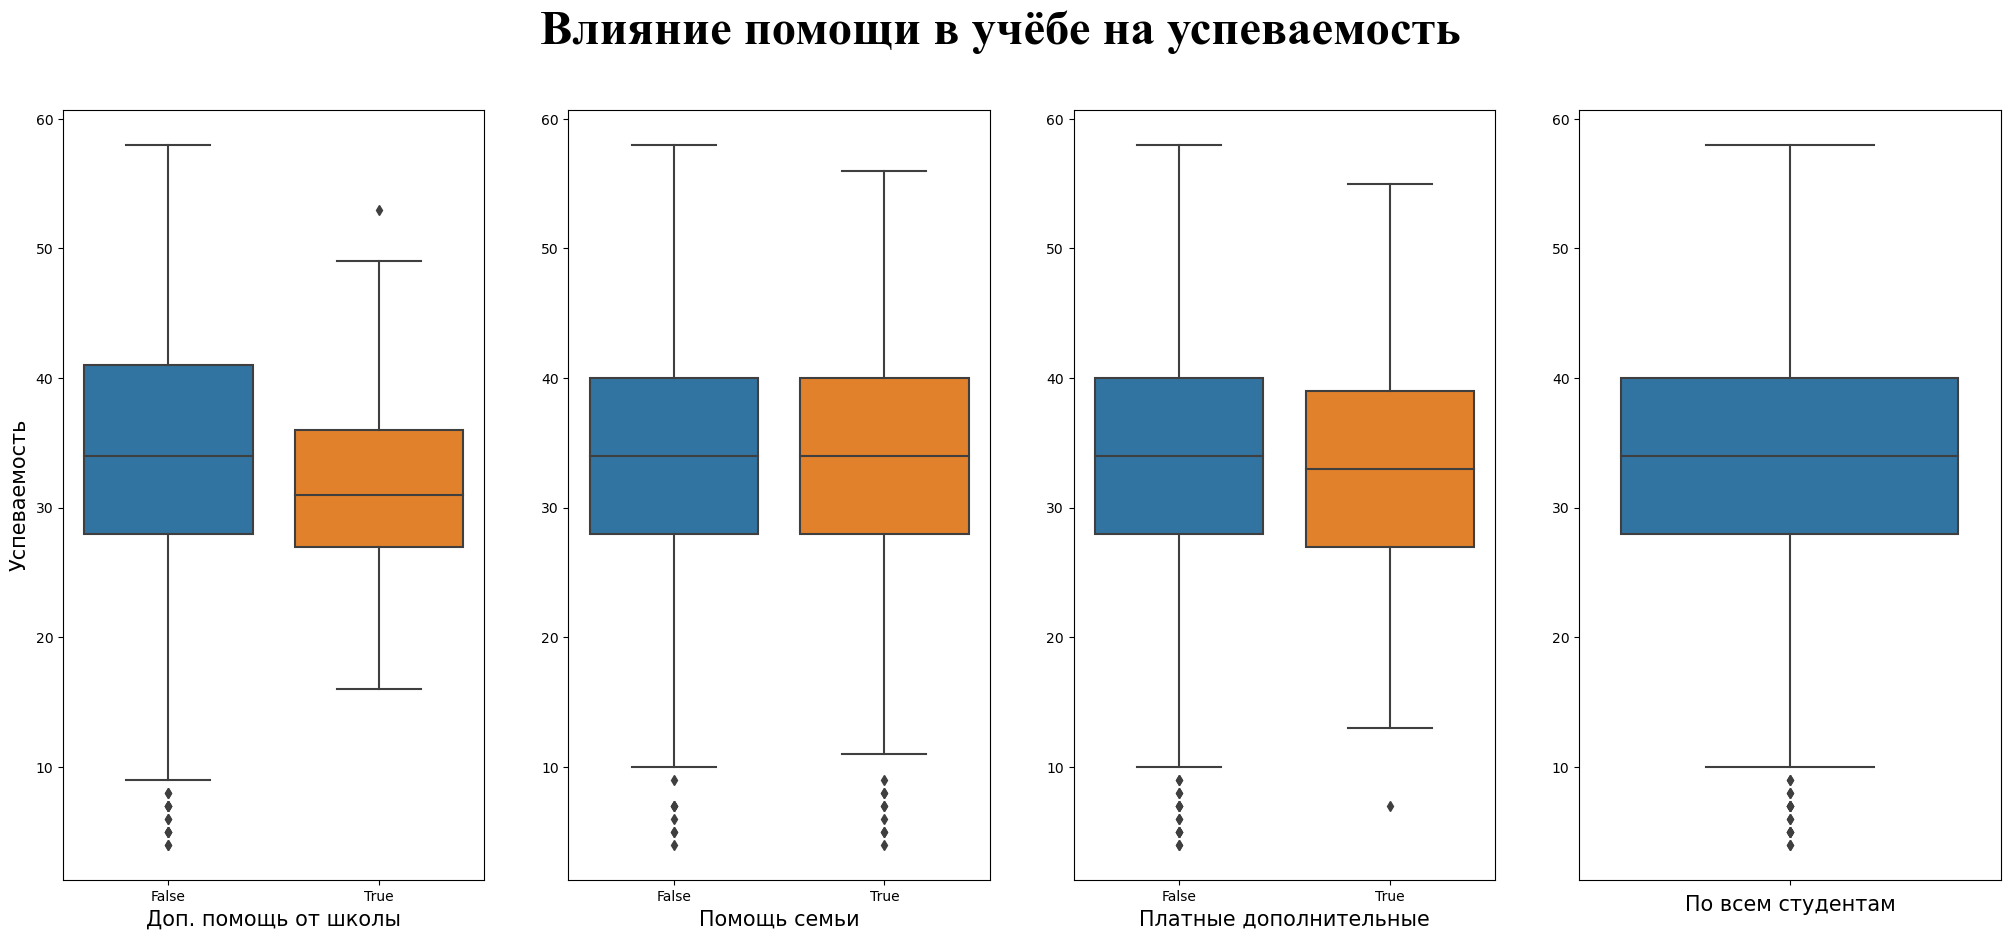

In [37]:
fig, axs = plt.subplots(1, 4, figsize=(25, 10))
fig.suptitle('Влияние помощи в учёбе на успеваемость', fontsize=35, fontname="Times New Roman", fontweight='bold')

sns.boxplot(df, y='Успеваемость', x='Доп. помощь от школы', ax=axs.flat[0])
axs.flat[0].set_xlabel('Доп. помощь от школы', fontsize=15)
axs.flat[0].set_ylabel('Успеваемость', fontsize=15)
sns.boxplot(df, y='Успеваемость', x='Помощь семьи', ax=axs.flat[1])
axs.flat[1].set_xlabel('Помощь семьи', fontsize=15)
sns.boxplot(df, y='Успеваемость', x='Платные дополнительные', ax=axs.flat[2])
axs.flat[2].set_xlabel('Платные дополнительные', fontsize=15)
sns.boxplot(y=df['Успеваемость'], ax=axs.flat[3])
axs.flat[3].set_xlabel('По всем студентам', fontsize=15)
for ax in axs.flat[1:]:
    ax.set_ylabel('')

### Построение графика 3

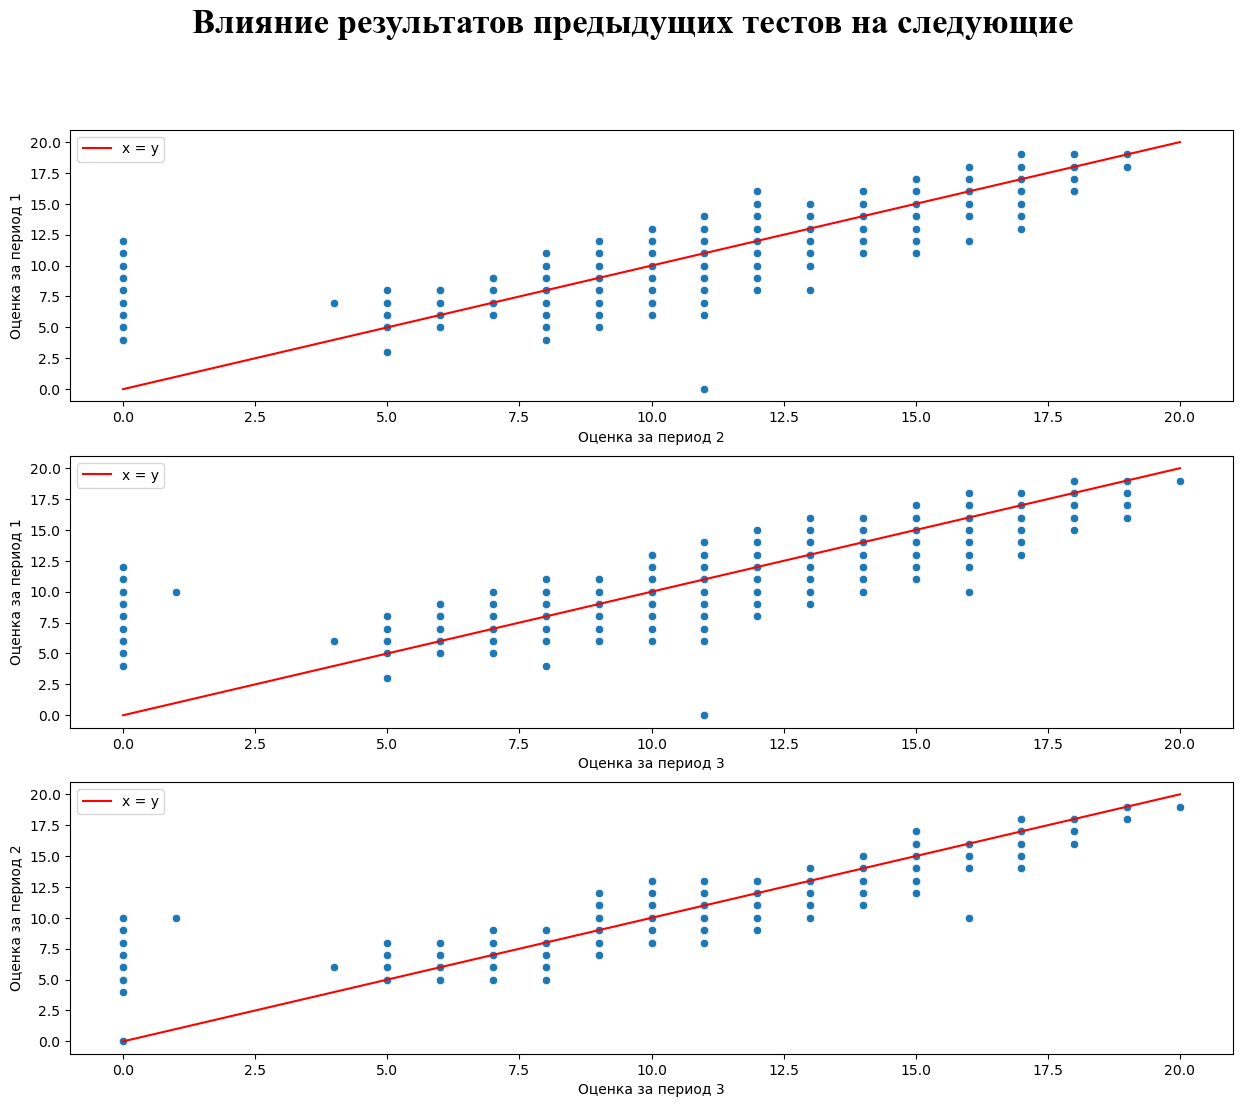

In [38]:
x = np.arange(0, 21)
fig, axs = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Влияние результатов предыдущих тестов на следующие', fontsize=25, fontname="Times New Roman", fontweight='bold')

sns.scatterplot(df, x="Оценка за период 2", y="Оценка за период 1", ax=axs.flat[0])
axs.flat[0].plot(x, x, color='r', label='x = y')
axs.flat[0].legend()
sns.scatterplot(df, x="Оценка за период 3", y="Оценка за период 1", ax=axs.flat[1])
axs.flat[1].plot(x, x, color='r', label='x = y')
axs.flat[1].legend()
sns.scatterplot(df, x="Оценка за период 3", y="Оценка за период 2", ax=axs.flat[2])
axs.flat[2].plot(x, x, color='r', label='x = y')
axs.flat[2].legend();

Проверяю теорию об ушедших/отчисленных

In [39]:
df2 = df[df['Оценка за период 2'] == 0]
df2[df2['Оценка за период 3'] != 0]

,Школа,Возраст,Образование матери,Образование отца,Профессия матери,Профессия отца,Причина выбора школы,Время до школы,Время на учёбу,Предыдущие провалы тестов,...,Пропуски занятий,Оценка за период 1,Оценка за период 2,Оценка за период 3,Пол,Живёт в городе,Семья из 3+ человек,Родители живут вместе,Опекун,Успеваемость


### Построение графика 4

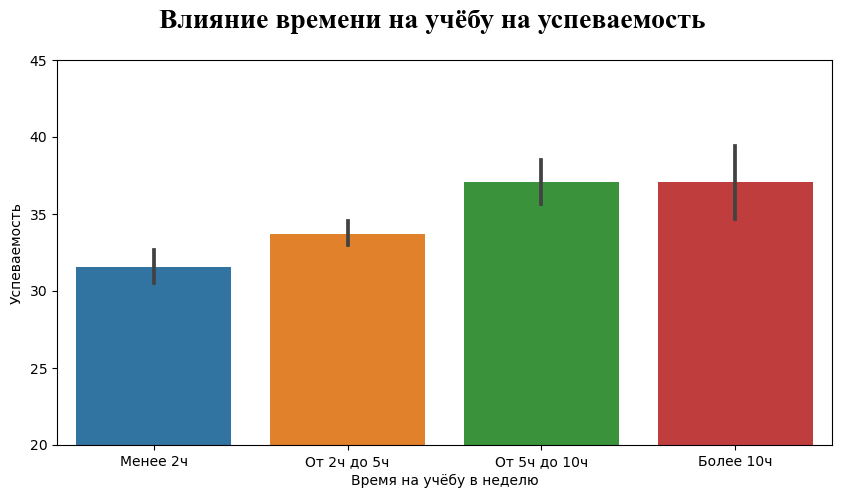

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Влияние времени на учёбу на успеваемость', fontsize=20, fontname="Times New Roman", fontweight='bold')
sns.barplot(df, x='Время на учёбу', y='Успеваемость')
ax.set(xlabel='Время на учёбу в неделю', xticklabels=['Менее 2ч', "От 2ч до 5ч", "От 5ч до 10ч", "Более 10ч"])
plt.axis([None, None, 20, 45]);

### Построение графика 5

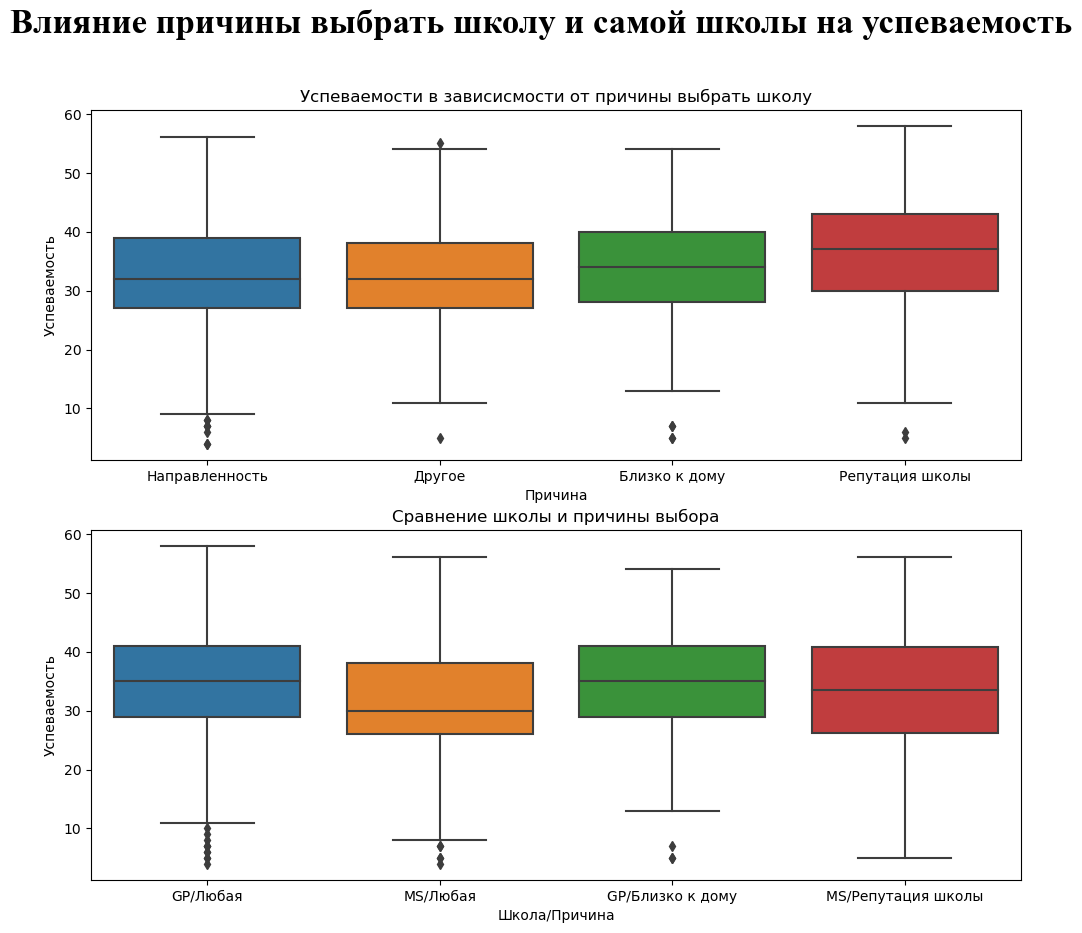

In [41]:
x = np.arange(0, 21)
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Влияние причины выбрать школу и самой школы на успеваемость', fontsize=25, fontname="Times New Roman", fontweight='bold')

sns.boxplot(df, x="Причина выбора школы", y="Успеваемость", ax=axs.flat[0])
axs.flat[0].set(title='Успеваемости в зависисмости от причины выбрать школу', xlabel='Причина',
       xticklabels=['Направленность', 'Другое', 'Близко к дому', 'Репутация школы'])

df1 = df[df['Причина выбора школы'] == 'home']
df1 = df1[df1['Школа'] == 'GP']
df1['Школа'] = 'GP1'
df2 = df[df['Причина выбора школы'] == 'reputation']
df2 = df2[df2['Школа'] == 'MS']
df2['Школа'] = 'MS1'
sns.boxplot(pd.concat((df, df1, df2)), x='Школа', y='Успеваемость', ax=axs.flat[1])
ax=axs.flat[1].set(title='Сравнение школы и причины выбора', xlabel='Школа/Причина', 
       xticklabels=["GP/Любая", "MS/Любая", "GP/Близко к дому", "MS/Репутация школы"])

### Построение графика 6

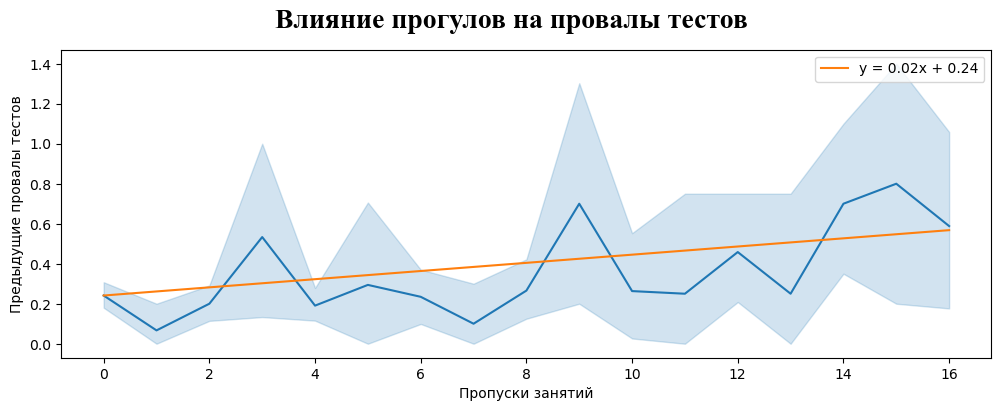

In [42]:
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('Влияние прогулов на провалы тестов', fontsize=20, fontname="Times New Roman", fontweight='bold')

sns.lineplot(df[df["Пропуски занятий"] <= df["Пропуски занятий"].quantile(0.95)], y="Предыдущие провалы тестов", x="Пропуски занятий", ax=ax)

x = np.arange(0, 17)
min_ = df[df["Пропуски занятий"] == 0]["Предыдущие провалы тестов"].mean()
max_ = df[df["Пропуски занятий"] == df["Пропуски занятий"].quantile(0.95)]["Предыдущие провалы тестов"].mean()
step_ = (max_ - min_) / (df["Пропуски занятий"].quantile(0.95) + 1)
y = np.arange(min_, max_, step_)
ax.plot(x, y, label=f'y = {step_:.2f}x + {min_:.2f}')

ax.legend();

### Построение графика 7

In [43]:
df['Образование родителей'] = round((df["Образование матери"] + df["Образование отца"]) / 2)
df['Образование родителей'] = df['Образование родителей'].astype(int)

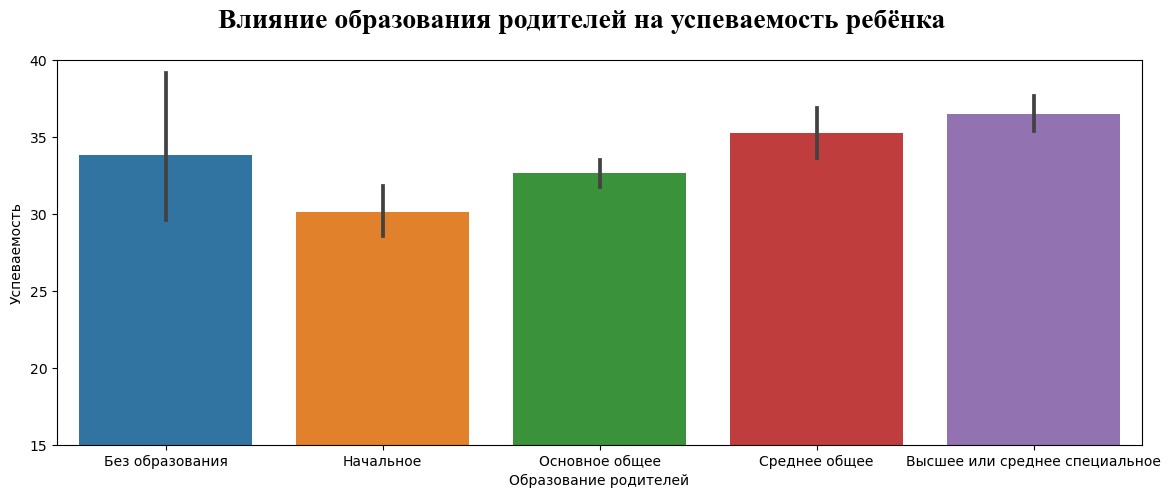

In [44]:
fig, ax = plt.subplots(figsize=(14, 5))
fig.suptitle('Влияние образования родителей на успеваемость ребёнка', fontsize=20, fontname="Times New Roman", fontweight='bold')
sns.barplot(df, x='Образование родителей', y='Успеваемость', ax=ax)
ax.axis((None, None, 15, 40))
ax.set_xticklabels(['Без образования', 'Начальное', "Основное общее", "Среднее общее", "Высшее или среднее специальное"]);

### Построение графика 8

In [45]:
df['Активность личной жизни'] = df['В отношениях']*4 + df['Свободное время']\
    + df['Прогулки с друзьями'] + df['Алкоголь по будням'] + df['Алкоголь по выходным'] - 4

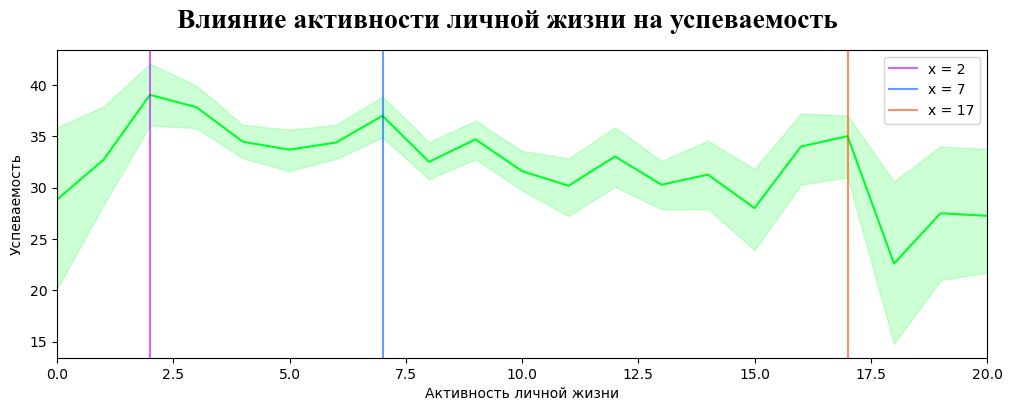

In [46]:
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('Влияние активности личной жизни на успеваемость', fontsize=20, fontname="Times New Roman", fontweight='bold')
sns.lineplot(df, x='Активность личной жизни', y='Успеваемость', ax=ax, color='#00ff2a')
ax.axvline(2, alpha=0.6, label='x = 2', color='#b200ff')
ax.axvline(7, alpha=0.6, label='x = 7', color='#0059ff')
ax.axvline(17, alpha=0.6, label='x = 17', color='#ff4400')
ax.axis((0, 20, None, None))
ax.legend();

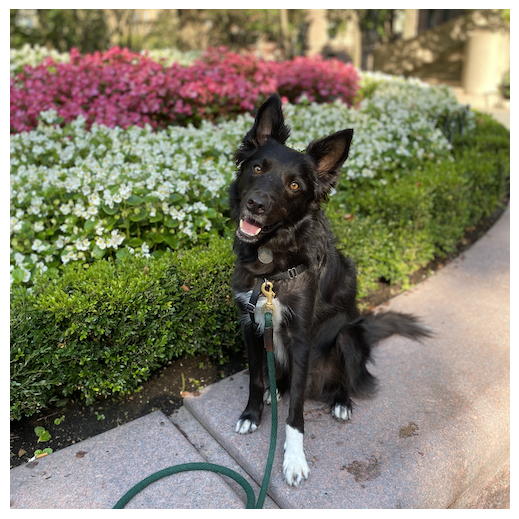

In [47]:
sns.dogplot(df)